In [1]:
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import arviz as az
from scipy.stats import norm, t
%matplotlib inline
plt.style.use('seaborn-white')
color = '#87ceeb'

In [20]:
df = pd.read_csv('data/ShohatOphirKAMH2012dataReduced.csv', dtype={'Group':'category'})

In [21]:
data = {
    'Ntotal': df.Group.size,
    'x': df.Group.cat.codes + 1,
    'y': df.PreferenceIndex,
    'meanY': df.PreferenceIndex.mean(),
    'sdY': df.PreferenceIndex.std()
}

In [4]:
model = pystan.StanModel(file='./models/alchohol-pref.stan')
fit = model.sampling(data=data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_76cac5f485ca417b0c428bc70f63fb35 NOW.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1db164e10>,
      dtype=object)

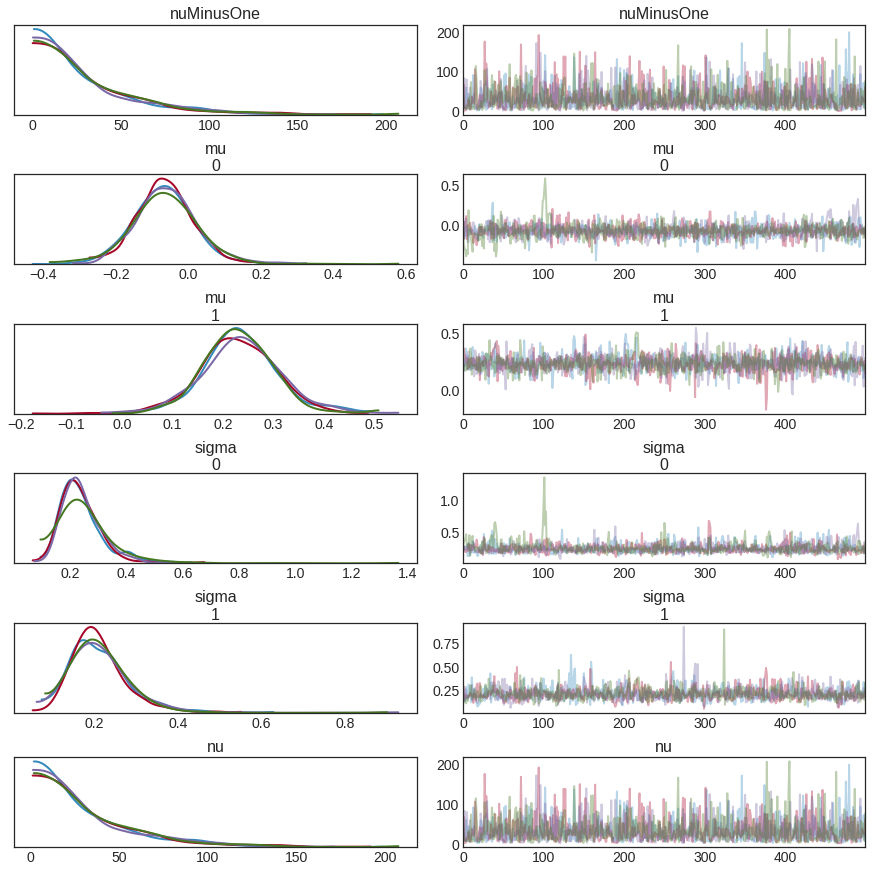

In [5]:
az.plot_trace(fit)

In [6]:
la = fit.extract(permuted=True)

In [24]:
df.Group.cat.categories

Index(['MatedGrouped', 'RejectedIsolated'], dtype='object')

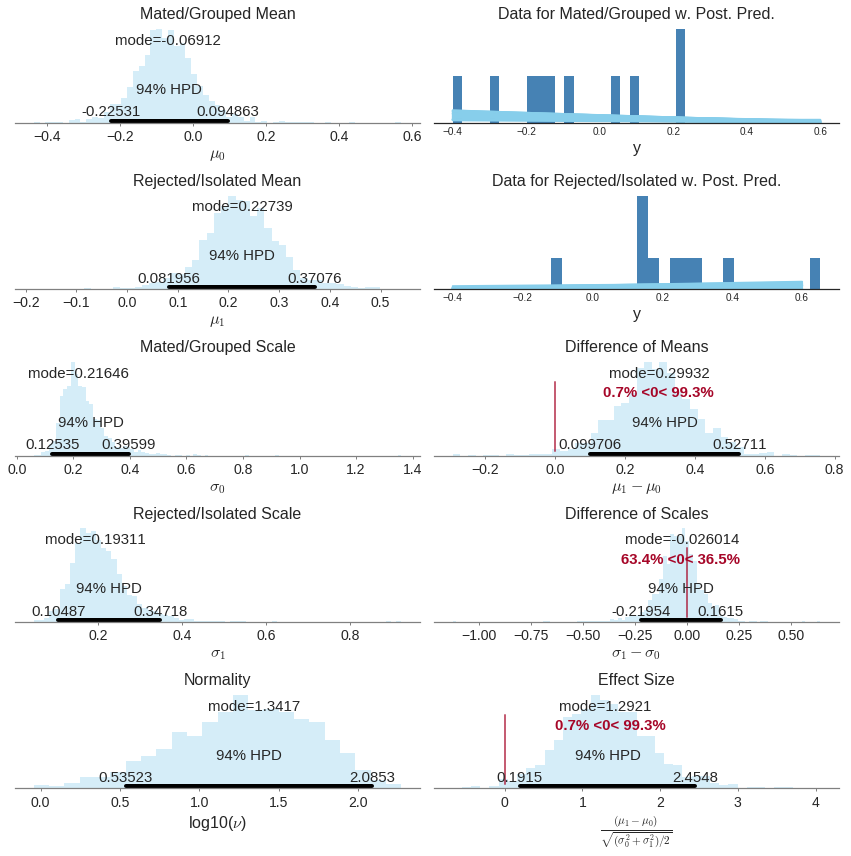

In [26]:
def plot_two_group(df, mu_0, sigma_0, mu_1, sigma_1, nu):
    font_d = {'size':16}

    color = '#87ceeb'
    
    log_nu = np.log10(nu)
    
    fig, axes = plt.subplots(5,2, figsize=(12, 12))
    
    # Left column figs
    l_trace_vars = (mu_0, mu_1, sigma_0, sigma_1, log_nu)
    l_axes_idx = np.arange(5)
    l_xlabels = ('$\mu_0$', '$\mu_1$', '$\sigma_0$', '$\sigma_1$', r'log10($\nu$)')
    l_titles = ('Mated/Grouped Mean', 'Rejected/Isolated Mean', 'Mated/Grouped Scale', 'Rejected/Isolated Scale', 'Normality')

    for var, ax_i, xlabel, title in zip(l_trace_vars, l_axes_idx, l_xlabels, l_titles): 
        az.plot_posterior(var, point_estimate='mode', round_to=5, ax=axes[ax_i,0], color=color, kind='hist')
        axes[ax_i,0].set_xlabel(xlabel, font_d)
        axes[ax_i,0].set_title(title, font_d)

    # Right column figs
    tr_len = len(sigma_0)
    n_curves = 20
    stepIdxVec = np.arange(0, tr_len, tr_len//n_curves)
    x_range = np.arange(df.PreferenceIndex.min(), df.PreferenceIndex.max())
    x = np.tile(x_range.reshape(-1,1), (1,20))

    # 1
    axes[0,1].hist(df.PreferenceIndex[df.Group == 'MatedGrouped'], bins=25, density=True, color='steelblue')
    axes[0,1].plot(x, t.pdf(x, loc=mu_0[stepIdxVec], scale=sigma_0[stepIdxVec], df=nu[stepIdxVec]), c=color)
    axes[0,1].set_xlabel('y', font_d)
    [axes[0,1].spines[spine].set_visible(False) for spine in ['left', 'right', 'top']]
    axes[0,1].yaxis.set_visible(False)
    axes[0,1].set_title('Data for Mated/Grouped w. Post. Pred.', font_d)

    # 2
    axes[1,1].hist(df.PreferenceIndex[df.Group == 'RejectedIsolated'], bins=25, density=True, color='steelblue')
    axes[1,1].plot(x, t.pdf(x, loc=mu_1[stepIdxVec], scale=sigma_1[stepIdxVec], df=nu[stepIdxVec]), c=color)
    axes[1,1].set_xlabel('y', font_d)
    [axes[1,1].spines[spine].set_visible(False) for spine in ['left', 'right', 'top']]
    axes[1,1].yaxis.set_visible(False)
    axes[1,1].set_title('Data for Rejected/Isolated w. Post. Pred.', font_d)

    # 3-5
    r_vars = (mu_1 - mu_0,
              sigma_1 - sigma_0,
              (mu_1 - mu_0)/np.sqrt((sigma_0**2+sigma_1**2)/2))
    r_axes_idx = np.arange(start=2, stop=5)
    r_xlabels = ('$\mu_1 - \mu_0$',
                 '$\sigma_1 - \sigma_0$',
                 r'$\frac{(\mu_1-\mu_0)}{\sqrt{(\sigma_0^2+\sigma_1^2)/2}}$')
    r_titles = ('Difference of Means',
                'Difference of Scales',
                'Effect Size')

    for var, ax_i, xlabel, title in zip(r_vars, r_axes_idx, r_xlabels, r_titles):
        az.plot_posterior(var, point_estimate='mode', round_to=5, ref_val=0, ax=axes[ax_i,1], color=color, kind='hist')
        axes[ax_i,1].set_xlabel(xlabel, font_d)
        axes[ax_i,1].set_title(title, font_d)
        
    return fig, axes


fig, ax = plot_two_group(iq_df, la['mu'][:,0], la['sigma'][:,0], la['mu'][:,1], la['sigma'][:,1], la['nu'])

plt.tight_layout();

In [27]:
data = {
    'Ntotal': df.Group.size,
    'x': df.Group.cat.codes + 1,
    'y': df.GrandTotal,
    'meanY': df.GrandTotal.mean(),
    'sdY': df.GrandTotal.std()
}
model = pystan.StanModel(file='./models/alchohol-pref.stan')
fit = model.sampling(data=data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_76cac5f485ca417b0c428bc70f63fb35 NOW.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d83bcb38>,
      dtype=object)

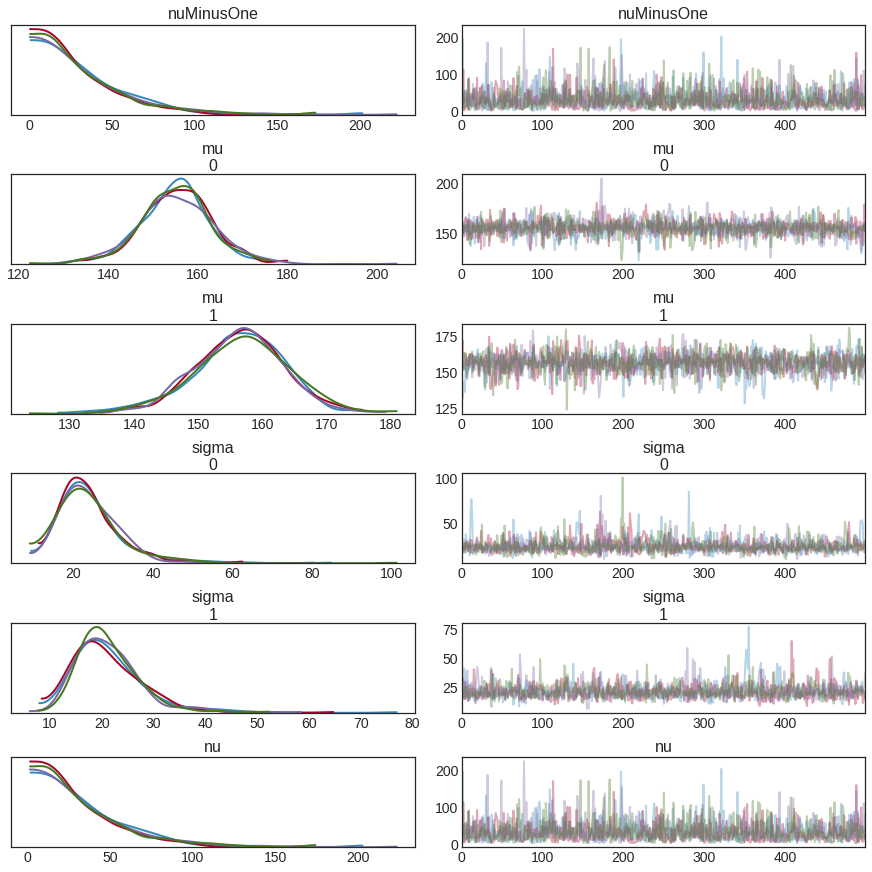

In [28]:
az.plot_trace(fit)

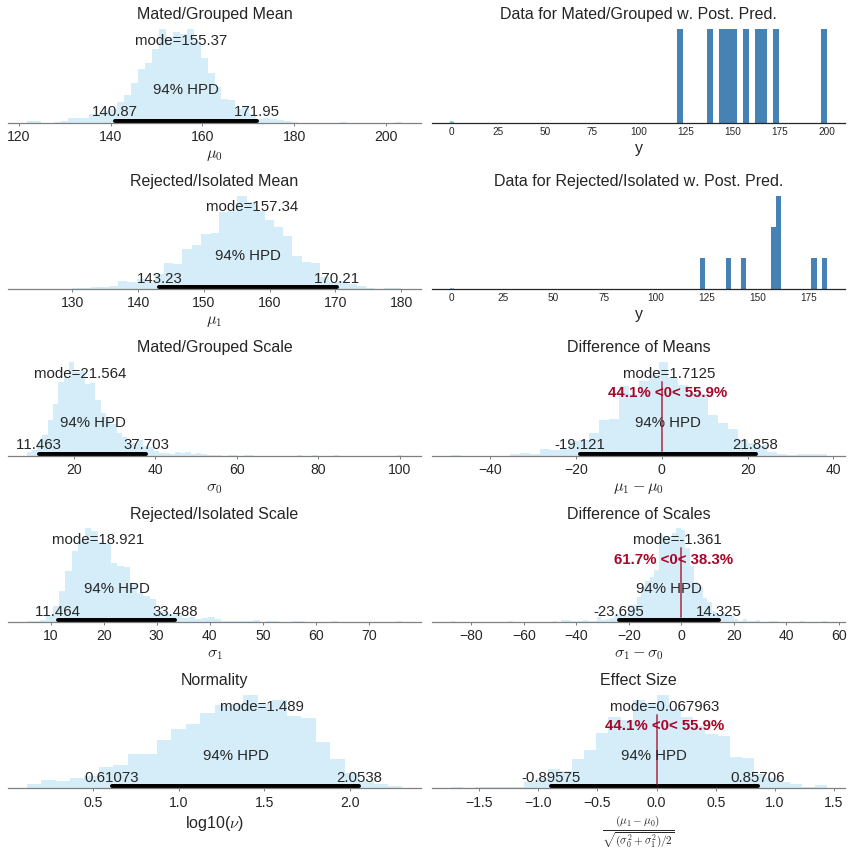

In [30]:
la2 = fit.extract(permuted=True)

def plot_two_group(df, mu_0, sigma_0, mu_1, sigma_1, nu):
    font_d = {'size':16}

    color = '#87ceeb'
    
    log_nu = np.log10(nu)
    
    fig, axes = plt.subplots(5,2, figsize=(12, 12))
    
    # Left column figs
    l_trace_vars = (mu_0, mu_1, sigma_0, sigma_1, log_nu)
    l_axes_idx = np.arange(5)
    l_xlabels = ('$\mu_0$', '$\mu_1$', '$\sigma_0$', '$\sigma_1$', r'log10($\nu$)')
    l_titles = ('Mated/Grouped Mean', 'Rejected/Isolated Mean', 'Mated/Grouped Scale', 'Rejected/Isolated Scale', 'Normality')

    for var, ax_i, xlabel, title in zip(l_trace_vars, l_axes_idx, l_xlabels, l_titles): 
        az.plot_posterior(var, point_estimate='mode', round_to=5, ax=axes[ax_i,0], color=color, kind='hist')
        axes[ax_i,0].set_xlabel(xlabel, font_d)
        axes[ax_i,0].set_title(title, font_d)

    # Right column figs
    tr_len = len(sigma_0)
    n_curves = 20
    stepIdxVec = np.arange(0, tr_len, tr_len//n_curves)
    x_range = np.arange(df.PreferenceIndex.min(), df.PreferenceIndex.max())
    x = np.tile(x_range.reshape(-1,1), (1,20))

    # 1
    axes[0,1].hist(df.GrandTotal[df.Group == 'MatedGrouped'], bins=25, density=True, color='steelblue')
    axes[0,1].plot(x, t.pdf(x, loc=mu_0[stepIdxVec], scale=sigma_0[stepIdxVec], df=nu[stepIdxVec]), c=color)
    axes[0,1].set_xlabel('y', font_d)
    [axes[0,1].spines[spine].set_visible(False) for spine in ['left', 'right', 'top']]
    axes[0,1].yaxis.set_visible(False)
    axes[0,1].set_title('Data for Mated/Grouped w. Post. Pred.', font_d)

    # 2
    axes[1,1].hist(df.GrandTotal[df.Group == 'RejectedIsolated'], bins=25, density=True, color='steelblue')
    axes[1,1].plot(x, t.pdf(x, loc=mu_1[stepIdxVec], scale=sigma_1[stepIdxVec], df=nu[stepIdxVec]), c=color)
    axes[1,1].set_xlabel('y', font_d)
    [axes[1,1].spines[spine].set_visible(False) for spine in ['left', 'right', 'top']]
    axes[1,1].yaxis.set_visible(False)
    axes[1,1].set_title('Data for Rejected/Isolated w. Post. Pred.', font_d)

    # 3-5
    r_vars = (mu_1 - mu_0,
              sigma_1 - sigma_0,
              (mu_1 - mu_0)/np.sqrt((sigma_0**2+sigma_1**2)/2))
    r_axes_idx = np.arange(start=2, stop=5)
    r_xlabels = ('$\mu_1 - \mu_0$',
                 '$\sigma_1 - \sigma_0$',
                 r'$\frac{(\mu_1-\mu_0)}{\sqrt{(\sigma_0^2+\sigma_1^2)/2}}$')
    r_titles = ('Difference of Means',
                'Difference of Scales',
                'Effect Size')

    for var, ax_i, xlabel, title in zip(r_vars, r_axes_idx, r_xlabels, r_titles):
        az.plot_posterior(var, point_estimate='mode', round_to=5, ref_val=0, ax=axes[ax_i,1], color=color, kind='hist')
        axes[ax_i,1].set_xlabel(xlabel, font_d)
        axes[ax_i,1].set_title(title, font_d)
        
    return fig, axes


fig, ax = plot_two_group(df, la2['mu'][:,0], la2['sigma'][:,0], la2['mu'][:,1], la2['sigma'][:,1], la2['nu'])

plt.tight_layout();